In [1]:
import tensorflow as tf
devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    details = tf.config.experimental.get_device_details(gpus[0])
    print("GPU details: ", details)



Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU details:  {'device_name': 'METAL'}


In [1]:
import tensorflow as tf
print("GPUs available:", tf.config.list_physical_devices('GPU'))


GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, AveragePooling2D, Activation
import matplotlib.pyplot as plt

## Basic structure


In [4]:
# Define image parameters
img_height, img_width = 128, 128
batch_size = 32


# Define paths to your dataset directories
train_dir = '/Users/milind/Documents/try/Untitled Folder/All oranges/Train'        # Replace with your training data directory
validation_dir = '/Users/milind/Documents/try/Untitled Folder/All oranges/Test'  # Replace with your validation data directory


# Create ImageDataGenerators for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=40,        # Randomly rotate images   ##********** causing permission error
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Random shear
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'       # Fill strategy for new pixels
)

# For validation data, only rescaling is applied
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators that read images from the directories
train_generator_all = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3061 images belonging to 2 classes.
Found 791 images belonging to 2 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
2025-04-06 16:35:48.290581: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-04-06 16:35:48.290846: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-06 16:35:48.290867: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-06 16:35:48.291449: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not ide

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,675,490 (10.21 MB)

 Trainable params: 2,675,490 (10.21 MB)

 Non-trainable params: 0 (0.00 B)

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-04-06 16:35:52.579544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.4961 - loss: 0.6974

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 34s 331ms/step - accuracy: 0.4962 - loss: 0.6974 - val_accuracy: 0.5091 - val_loss: 0.6932
Epoch 2/10
 1/95 ━━━━━━━━━━━━━━━━━━━━ 14s 153ms/step - accuracy: 0.5312 - loss: 0.6888

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.5312 - loss: 0.6888 - val_accuracy: 0.5065 - val_loss: 0.6935
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 42s 443ms/step - accuracy: 0.4886 - loss: 0.6951 - val_accuracy: 0.5065 - val_loss: 0.6935
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5938 - loss: 0.6829 - val_accuracy: 0.5104 - val_loss: 0.6932
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 36s 383ms/step - accuracy: 0.5144 - loss: 0.6931 - val_accuracy: 0.5104 - val_loss: 0.6931
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5000 - loss: 0.6943 - val_accuracy: 0.5065 - val_loss: 0.6934
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 35s 370ms/step - accuracy: 0.5244 - loss: 0.6927 - val_accuracy: 0.5143 - val_loss: 0.6928
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5000 - loss: 0.6955 - val_accuracy: 0.5104 - val_loss: 0.6931
Epoch 9/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 37s 383ms/step - accuracy: 0.5140 - loss: 0.6925 - val_accuracy: 0.5117 - val_

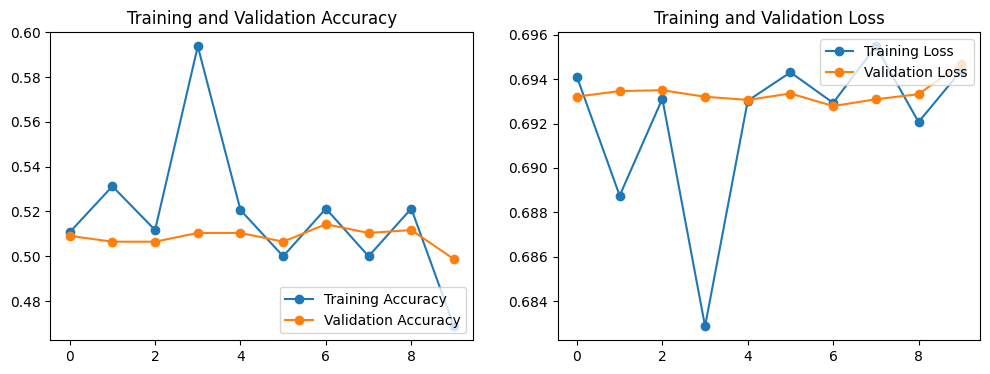

In [10]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.5),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.5),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.5),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.5),
    
    # Dense(1, activation='sigmoid')  # Binary classification

    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=10,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
# pip install scipy

## 30 epochs

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,914 (4.89 MB)

 Trainable params: 1,280,914 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 32s 300ms/step - accuracy: 0.5298 - loss: 0.6625 - val_accuracy: 0.9049 - val_loss: 0.2803
Epoch 2/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8750 - loss: 0.4795 - val_accuracy: 0.9128 - val_loss: 0.2783
Epoch 3/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 246ms/step - accuracy: 0.8452 - loss: 0.3705 - val_accuracy: 0.9193 - val_loss: 0.2272
Epoch 4/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9375 - loss: 0.1632 - val_accuracy: 0.8490 - val_loss: 0.3429
Epoch 5/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 244ms/step - accuracy: 0.8582 - loss: 0.3428 - val_accuracy: 0.9219 - val_loss: 0.1997
Epoch 6/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9688 - loss: 0.1746 - val_accuracy: 0.9219 - val_loss: 0.1943
Epoch 7/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 22s 227ms/step - accuracy: 0.8915 - loss: 0.2711 - val_accuracy: 0.8789 - val_loss: 0.3070
Epoch 8/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8125 - loss: 0.5344 - val_accuracy: 0.

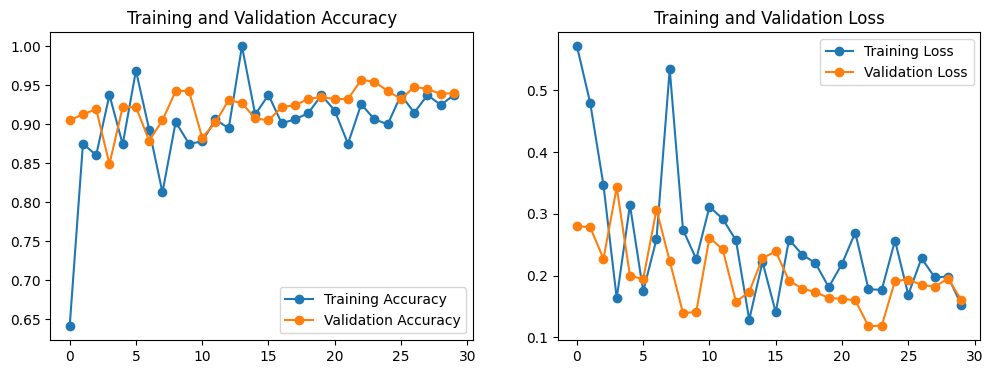

In [12]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 80 epochs

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,914 (4.89 MB)

 Trainable params: 1,280,914 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
95/95 ━━━━━━━━━━━━━━━━━━━━ 29s 274ms/step - accuracy: 0.5814 - loss: 0.6555 - val_accuracy: 0.8112 - val_loss: 0.4214
Epoch 2/80
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9062 - loss: 0.3648 - val_accuracy: 0.8047 - val_loss: 0.4247
Epoch 3/80
95/95 ━━━━━━━━━━━━━━━━━━━━ 47s 385ms/step - accuracy: 0.8111 - loss: 0.4123 - val_accuracy: 0.9206 - val_loss: 0.2345
Epoch 4/80
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9062 - loss: 0.2302 - val_accuracy: 0.9167 - val_loss: 0.2347
Epoch 5/80
95/95 ━━━━━━━━━━━━━━━━━━━━ 31s 318ms/step - accuracy: 0.8809 - loss: 0.3013 - val_accuracy: 0.9206 - val_loss: 0.2031
Epoch 6/80
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8438 - loss: 0.3220 - val_accuracy: 0.9141 - val_loss: 0.2244
Epoch 7/80
95/95 ━━━━━━━━━━━━━━━━━━━━ 29s 308ms/step - accuracy: 0.8803 - loss: 0.2831 - val_accuracy: 0.9167 - val_loss: 0.2200
Epoch 8/80
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9375 - loss: 0.2020 - val_accuracy: 0.

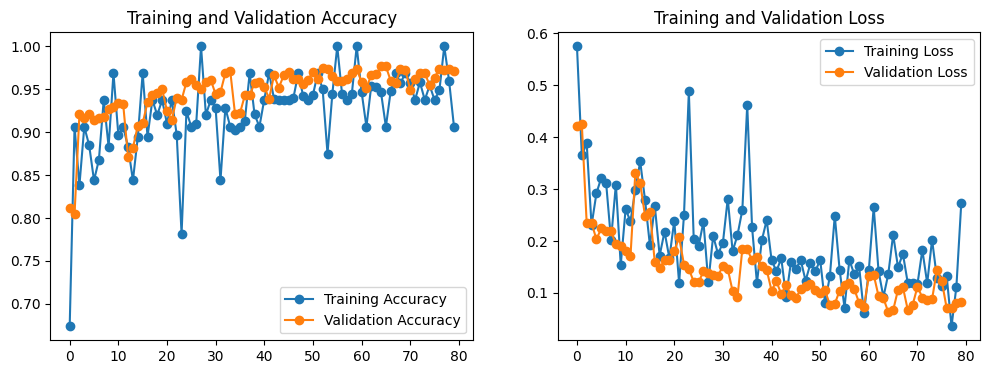

In [14]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=80,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 120 epochs

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,914 (4.89 MB)

 Trainable params: 1,280,914 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/120
95/95 ━━━━━━━━━━━━━━━━━━━━ 43s 420ms/step - accuracy: 0.5070 - loss: 0.7024 - val_accuracy: 0.5443 - val_loss: 0.6361
Epoch 2/120
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5312 - loss: 0.7579 - val_accuracy: 0.7708 - val_loss: 0.4974
Epoch 3/120
95/95 ━━━━━━━━━━━━━━━━━━━━ 42s 442ms/step - accuracy: 0.7845 - loss: 0.4677 - val_accuracy: 0.9128 - val_loss: 0.2373
Epoch 4/120
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 1.0000 - loss: 0.1153 - val_accuracy: 0.8971 - val_loss: 0.2701
Epoch 5/120
95/95 ━━━━━━━━━━━━━━━━━━━━ 33s 346ms/step - accuracy: 0.8540 - loss: 0.3643 - val_accuracy: 0.9141 - val_loss: 0.2275
Epoch 6/120
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9375 - loss: 0.2393 - val_accuracy: 0.9115 - val_loss: 0.2342
Epoch 7/120
95/95 ━━━━━━━━━━━━━━━━━━━━ 39s 415ms/step - accuracy: 0.8862 - loss: 0.2916 - val_accuracy: 0.8867 - val_loss: 0.2468
Epoch 8/120
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.8750 - loss: 0.3816 - val_accu

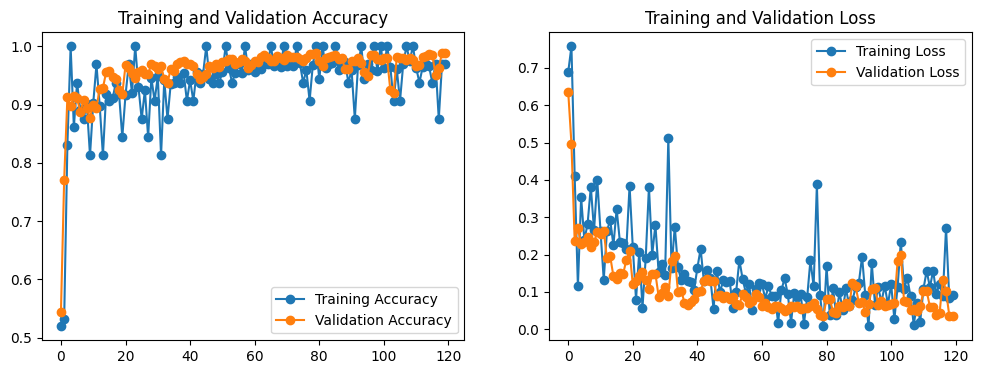

In [19]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=120,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test loss: {loss * 100:.2f}%')

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9860 - loss: 0.0396
Test Accuracy: 98.86%
Test loss: 3.54%


Text(0.5, 1.0, 'Training and Validation Accuracy')

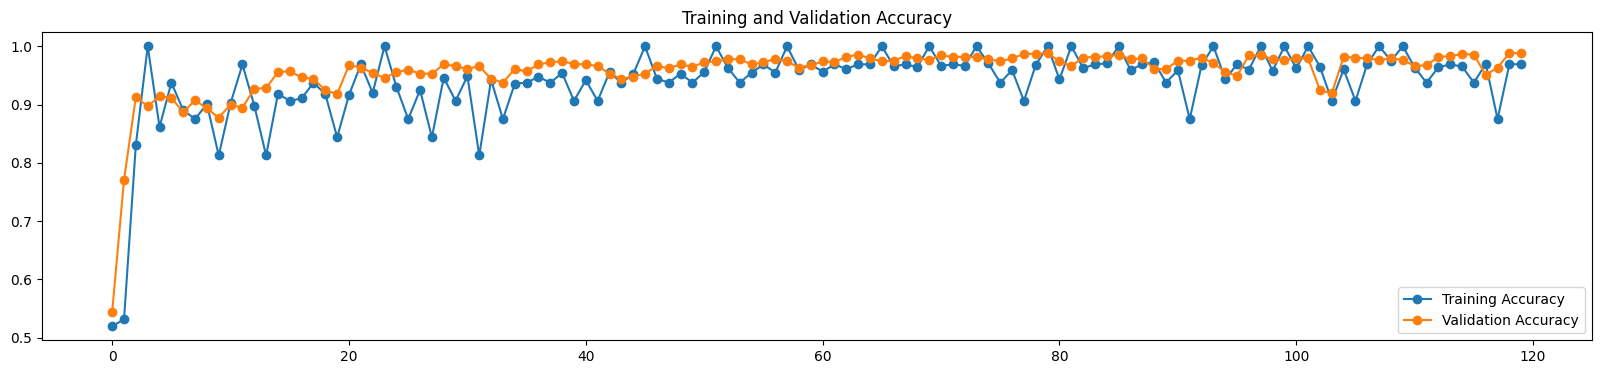

In [51]:
plt.figure(figsize=(20, 4))
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

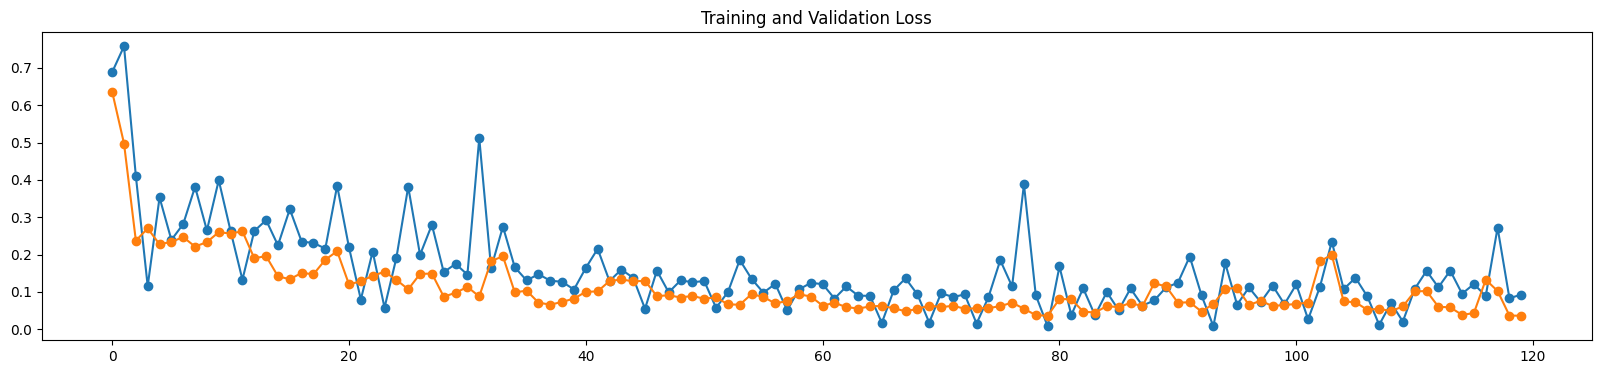

In [53]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(20, 4))
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.show()

## Without dropout  ( 94% with drop out and 30 epochs )

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,914 (4.89 MB)

 Trainable params: 1,280,914 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.6876 - loss: 0.5545 - val_accuracy: 0.8958 - val_loss: 0.2765
Epoch 2/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.8438 - loss: 0.3696 - val_accuracy: 0.9323 - val_loss: 0.2454
Epoch 3/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 89s 929ms/step - accuracy: 0.8629 - loss: 0.3265 - val_accuracy: 0.9089 - val_loss: 0.2376
Epoch 4/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.9048 - loss: 0.2750 - val_accuracy: 0.9010 - val_loss: 0.2500
Epoch 5/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 65s 676ms/step - accuracy: 0.8574 - loss: 0.3279 - val_accuracy: 0.8542 - val_loss: 0.3119
Epoch 6/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.8438 - loss: 0.3781 - val_accuracy: 0.8620 - val_loss: 0.3006
Epoch 7/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 66s 686ms/step - accuracy: 0.8577 - loss: 0.3196 - val_accuracy: 0.9115 - val_loss: 0.2461
Epoch 8/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.8750 - loss: 0.3219 - val_accuracy: 0.

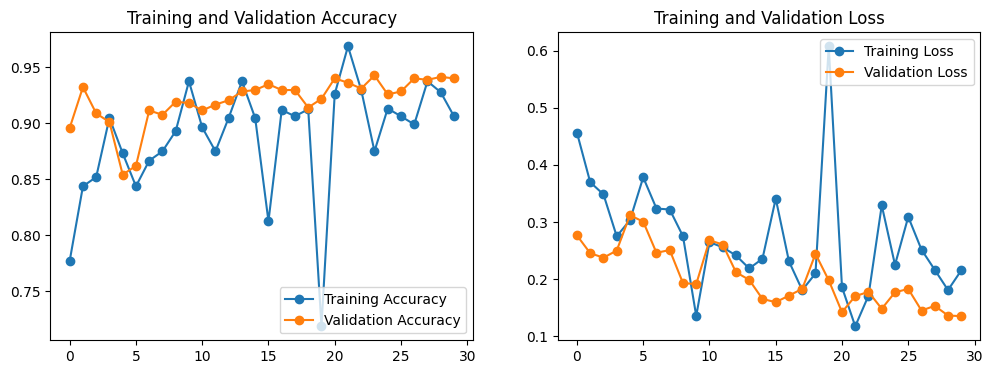

In [15]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test loss: {loss :.2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 243ms/step - accuracy: 0.9514 - loss: 0.1265
Test Accuracy: 93.81%
Test loss: 0.14


# With Dropout

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,914 (4.89 MB)

 Trainable params: 1,280,914 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 29s 236ms/step - accuracy: 0.6359 - loss: 0.6112 - val_accuracy: 0.7669 - val_loss: 0.4368
Epoch 2/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6875 - loss: 0.5942 - val_accuracy: 0.8477 - val_loss: 0.3450
Epoch 3/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 22s 227ms/step - accuracy: 0.8193 - loss: 0.4159 - val_accuracy: 0.9076 - val_loss: 0.2709
Epoch 4/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8438 - loss: 0.2933 - val_accuracy: 0.8893 - val_loss: 0.3304
Epoch 5/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 22s 235ms/step - accuracy: 0.8629 - loss: 0.3427 - val_accuracy: 0.9219 - val_loss: 0.2316
Epoch 6/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9688 - loss: 0.1835 - val_accuracy: 0.9219 - val_loss: 0.2230
Epoch 7/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 22s 231ms/step - accuracy: 0.8950 - loss: 0.2808 - val_accuracy: 0.9154 - val_loss: 0.2328
Epoch 8/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9375 - loss: 0.2485 - val_accuracy: 0.

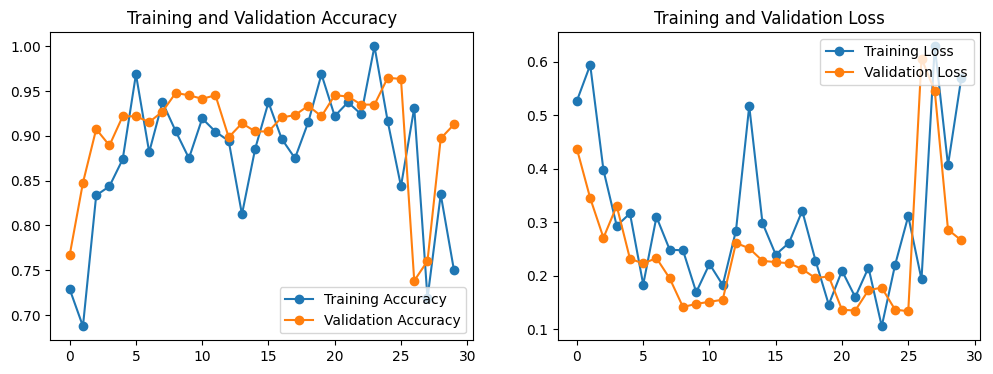

In [20]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test loss: {loss :.2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.9212 - loss: 0.2627
Test Accuracy: 91.28%
Test loss: 0.27
